In [1]:
import sys
sys.path.append('../')
import numpy as np
import matplotlib.pyplot as plt
from math import *
import odesolver
from scipy import optimize as op

# Ejercicio 6

Tomemos el siguiente PVI: 

\begin{array} $y'' = 10y' (1 - y)
\\y(0)=1 \\ y(1) = 1 - \frac{\pi}{20}
\end{array}

Para $t \in [0,1]$. Luego podemos reescribirlo como un sistema de ecuaciones de primer orden de la siguiente manera:

\begin{array} $y_1' = y_2 \\
y_2' = 10 y_2 (1 - y_1) \end{array}



Con solución exacta dada por :
\begin{equation}
 \begin{array}{c} 
     y(t) = 1-\frac{\pi}{20} \tan(\frac{\pi}{4}t) \\
     y(1) = 1-\frac{\pi}{20}
 \end{array} 
\end{equation}


Así, definimos f como

In [2]:
f = lambda t, y : np.array([y[1], 10*y[1]*(1-y[0])])
exact = lambda t : 1-pi/20*tan(pi/4*t)

Para aplicar Shooting Method, tomamos una aproximación inicial de $y_2 = 1$

$$\overrightarrow{y_0}(t) = \left(\begin{array}{c} y_1(t) \\
y_2(t)\end{array} \right) = \left( \begin{array}{c} 1
\\ 0 \end{array} \right)$$

y utilizaremos el método de Runge Kutta 4 con 1000 pasos para aproximar la función en $y(1)$

In [3]:
y0 = [1, 0]
_, W = odesolver.solve(f, y0, (0,1), 1000,  method = 'rk4')
ans = W[0][-1]
ans

1.0

Veamos que tan acertada fue nuestra elección

In [4]:
abs(ans - (1 - pi/20))

0.15707963267948966

Parece ser que nuestra aproximación inicial sobreestimó la solución. Usaremos el método de Newton para seguir generando aproximaciones.

Definimos una función 
$F : \mathbb{R} \rightarrow \mathbb{R}$
que toma una estimación inical de $y_2 = y'$ y regresa la distancia a la solución delimitada por el BVP

In [5]:
I = (0,1)
y0 = 1
sol = 1 - pi/20
F = lambda yp0 : odesolver.solve(f, [y0, yp0], I, 1000,  method = 'rk4')[1][0][-1] - sol

In [6]:
F(0)

0.15707963267948966

En _odesolver_, definimos la función "shooting" que toma una función, un valor inicial de $y_1$, una aproximación inicial de $y_2$ y la la solución del BVP y crea la función F, para después aplicar el método de Newton hasta encontrar una raíz, o bien, encontrar el valor inicial de $y_2$ que hace que se satisfaga el BVP.

In [7]:
aprox, errors = odesolver.shooting(f, 1, 0, exact(1), (0,1), tol = 1e-10, maxiter=30, log = True)

After 1 itrerations, the suggested slope is -0.1571058117415369, which generates an error of 0.06011796937074976
After 2 itrerations, the suggested slope is -0.1136129484483078, which generates an error of 0.015605062058363206
After 3 itrerations, the suggested slope is -0.12257599202933653, which generates an error of 0.0012971130776441298
After 4 itrerations, the suggested slope is -0.1233885530092585, which generates an error of 3.0275526610390457e-05
After 5 itrerations, the suggested slope is -0.1233700198445987, which generates an error of 5.7558321331363516e-08
After 6 itrerations, the suggested slope is -0.12337005501206845, which generates an error of 2.5480728638171968e-12
Solution found after 6 iterations


In [8]:
aprox[-1]

-0.12337005501206845

In [9]:
F(aprox[-1])

2.5480728638171968e-12

Observamos que con esta aproximación inicial se satisface el BVP con un error menor a 1e-10

In [10]:
#Aproximaciones de y' inicial generadas por el método de Newton:
aprox

[-0.1571058117415369,
 -0.1136129484483078,
 -0.12257599202933653,
 -0.1233885530092585,
 -0.1233700198445987,
 -0.12337005501206845]

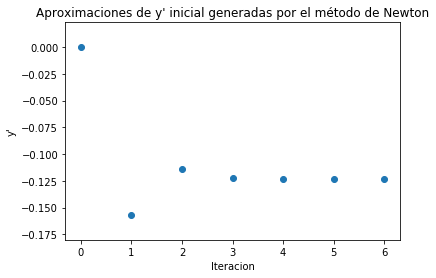

In [11]:
plt.scatter(range(7), [0]+aprox)
plt.title("Aproximaciones de y' inicial generadas por el método de Newton")
plt.xlabel('Iteracion')
plt.ylabel('y\'')
plt.show()

In [12]:
#Error generado por cada aproximación, usando RK4 con 1000 pasos:
errors

[0.06011796937074976,
 0.015605062058363206,
 0.0012971130776441298,
 3.0275526610390457e-05,
 5.7558321331363516e-08,
 2.5480728638171968e-12]

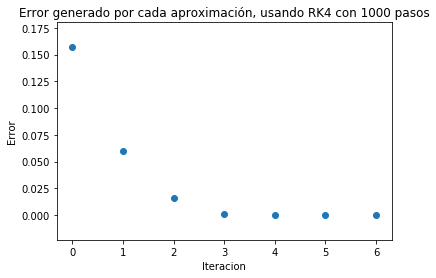

In [13]:
plt.scatter(range(7), [F(0)]+errors)
plt.title("Error generado por cada aproximación, usando RK4 con 1000 pasos")
plt.xlabel('Iteracion')
plt.ylabel('Error')
plt.show()